# Building Neural Networks with SciKit Learn

In [ ]:
#!pip install opencv-python

In [152]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Text and image libraries
from sklearn.feature_extraction.text import TfidfVectorizer
import cv2
import os

# Dimensionality Reduction libraries
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn import linear_model, metrics
from sklearn.model_selection import GridSearchCV

## Regression (Diet Data)

In [2]:
diet_data = pd.read_csv('datasets/diet_data.csv')
diet_data.head()

,Date,Stone,Pounds,Ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,7/30/2018,12.0,2.0,6.0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,-30.0
1,7/31/2018,12.0,0.0,8.0,2696.0,2600.0,0.96,1.0,0.0,0.0,0.0,0.0,0.0,8.0
2,8/1/2018,12.0,1.0,0.0,2704.0,2500.0,0.92,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,8/2/2018,12.0,1.0,0.0,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,-40.0
4,8/3/2018,11.0,12.0,8.0,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,14.0


In [3]:
diet_data.isnull().sum()

Date            1
Stone           9
Pounds          9
Ounces          9
weight_oz       2
calories       11
cals_per_oz     4
five_donuts    11
walk           11
run            11
wine           11
prot           11
weight         11
change          4
dtype: int64

In [4]:
diet_data = diet_data.dropna()

In [5]:
diet_data.isnull().sum()

Date           0
Stone          0
Pounds         0
Ounces         0
weight_oz      0
calories       0
cals_per_oz    0
five_donuts    0
walk           0
run            0
wine           0
prot           0
weight         0
change         0
dtype: int64

In [6]:
diet_data.describe()

,Stone,Pounds,Ounces,weight_oz,calories,five_donuts,walk,run,wine,prot,weight,change
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,11.542857,6.157143,3.585714,2687.700000,3180.714286,0.371429,0.678571,0.250000,0.307143,0.178571,0.442857,-1.485714
std,0.499949,5.664824,2.913589,28.663189,1478.753433,0.484922,0.468702,0.434568,0.462966,0.384368,0.498508,25.098793
min,11.000000,0.000000,0.000000,2628.000000,1400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-58.000000
25%,11.000000,1.000000,0.000000,2670.000000,2187.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.000000
50%,12.000000,3.000000,4.000000,2689.000000,2575.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-3.000000
75%,12.000000,12.000000,6.000000,2704.000000,3850.000000,1.000000,1.000000,0.250000,1.000000,0.000000,1.000000,16.000000
max,12.000000,13.000000,8.000000,2768.000000,9150.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.000000


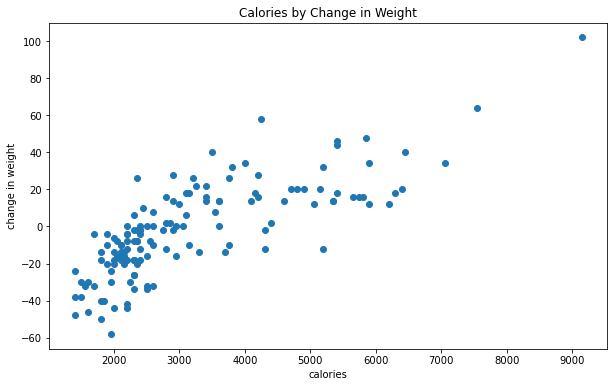

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(diet_data['calories'], diet_data['change'])
plt.xlabel('calories')
plt.title("Calories by Change in Weight")
ax = plt.ylabel('change in weight')

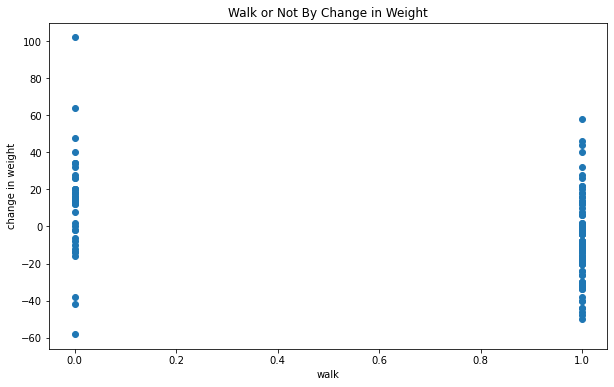

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(diet_data['walk'], diet_data['change'])
plt.title("Walk or Not By Change in Weight")
plt.xlabel('walk')
ax = plt.ylabel('change in weight')

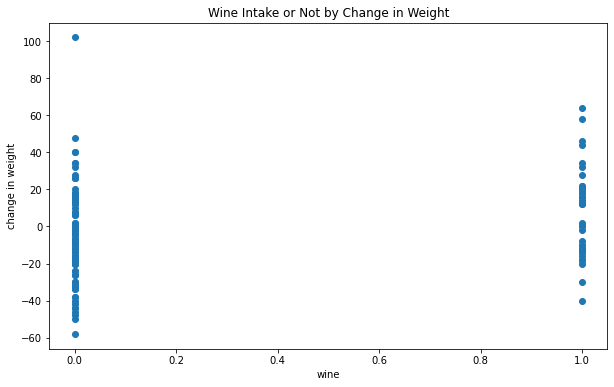

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(diet_data['wine'], diet_data['change'])
plt.title("Wine Intake or Not by Change in Weight")
plt.xlabel('wine')
ax = plt.ylabel('change in weight')

In [19]:
diet_data_corr = diet_data.corr()

diet_data_corr

,Stone,Pounds,Ounces,weight_oz,calories,five_donuts,walk,run,wine,prot,weight,change
Stone,1.000000,-0.980384,-0.190219,0.787595,0.002099,0.052567,-0.109649,-0.033113,-0.072821,-0.133707,0.009897,-0.286142
Pounds,-0.980384,1.000000,0.157404,-0.652264,-0.030854,-0.029257,0.122125,0.054065,0.030841,0.135703,0.010845,0.214880
Ounces,-0.190219,0.157404,1.000000,-0.143811,-0.012220,0.007856,0.049295,-0.031251,0.041677,0.040839,0.008350,0.123744
weight_oz,0.787595,-0.652264,-0.143811,1.000000,-0.090605,0.113664,-0.037218,0.038408,-0.182756,-0.089135,0.073811,-0.425912
calories,0.002099,-0.030854,-0.012220,-0.090605,1.000000,-0.239251,-0.434065,0.000840,0.270376,0.073819,0.123413,0.773989
five_donuts,0.052567,-0.029257,0.007856,0.113664,-0.239251,1.000000,0.275835,-0.136558,-0.159311,-0.281215,-0.149653,-0.214417
walk,-0.109649,0.122125,0.049295,-0.037218,-0.434065,0.275835,1.000000,-0.132453,-0.072229,0.201095,0.059382,-0.384581
run,-0.033113,0.054065,-0.031251,0.038408,0.000840,-0.136558,-0.132453,1.000000,-0.062577,-0.053838,0.249068,-0.150387
wine,-0.072821,0.030841,0.041677,-0.182756,0.270376,-0.159311,-0.072229,-0.062577,1.000000,-0.027434,-0.063680,0.215387
prot,-0.133707,0.135703,0.040839,-0.089135,0.073819,-0.281215,0.201095,-0.053838,-0.027434,1.000000,0.522965,0.035156


<AxesSubplot:>

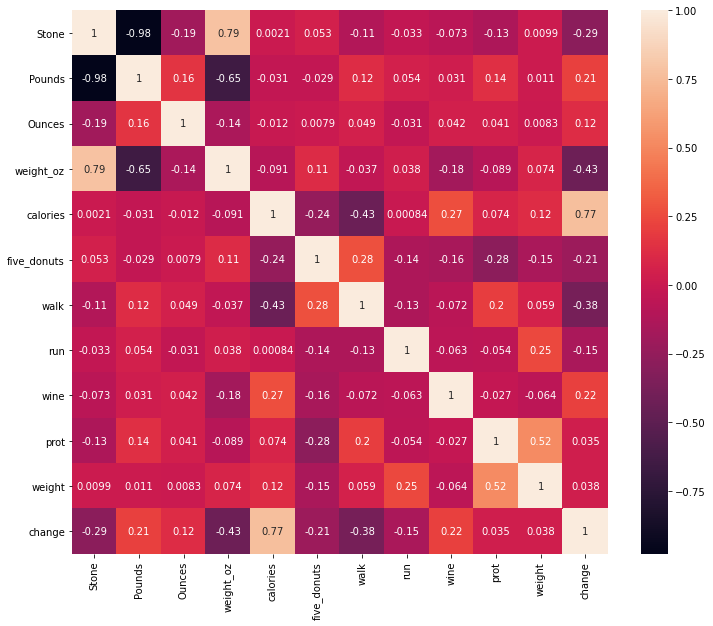

In [20]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(diet_data_corr, annot=True)

In [22]:
X = diet_data.drop(['change', 'Date', 'Stone', 'Pounds', 'Ounces'],axis=1)
Y = diet_data['change']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [24]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [27]:
mlp_reg = MLPRegressor(activation = 'relu',
                       hidden_layer_sizes= (1, ), 
                       solver='lbfgs', 
                       verbose=True,
                       max_iter=100)

In [28]:
mlp_reg.fit(x_train, y_train)

MLPRegressor(hidden_layer_sizes=(1,), max_iter=100, solver='lbfgs',
             verbose=True)

In [30]:
y_pred = mlp_reg.predict(x_test)
mlp_reg.score(x_train, y_train)

0.7095995955974621

In [31]:
r2_score(y_test, y_pred)

0.7010715881837459

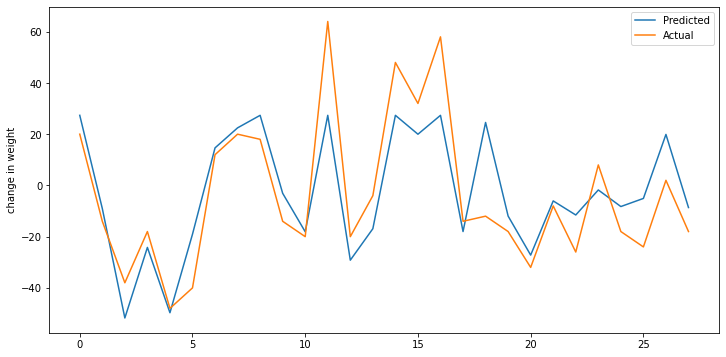

In [33]:
plt.figure(figsize = (12,6))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('change in weight')

plt.legend()
plt.show()

## Classification (Lower Back Spine Data)

In [34]:
spine_data = pd.read_csv('datasets/spine_data.csv',
                         skiprows=1,
                         names = ['pelvic_incidence',
                                  'pelvic tilt',
                                  'lumbar_lordosis_angle',
                                  'sacral_slope',
                                  'pelvic_radius',
                                  'degree_spondylolisthesis',
                                  'pelvic_slope',
                                  'direct_tilt',
                                  'thoracic_slope',
                                  'cervical_tilt',
                                  'sacrum_angle',
                                  'scoliosis_slope',
                                  'class'])

In [35]:
spine_data.shape

(310, 13)

In [36]:
spine_data.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [37]:
spine_data.isnull().sum()

pelvic_incidence            0
pelvic tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
class                       0
dtype: int64

In [38]:
spine_data.describe()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [39]:
spine_data = spine_data.sample(frac=1).reset_index(drop=True)

In [41]:
label_encoding = preprocessing.LabelEncoder()
spine_data['class'] = label_encoding.fit_transform(spine_data['class'].astype(str))

In [43]:
spine_data["class"].value_counts()

0    210
1    100
Name: class, dtype: int64

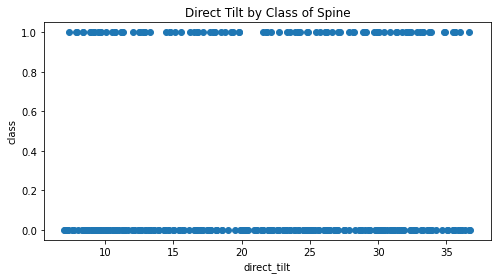

In [46]:
fig, ax = plt.subplots(figsize=(8,4))

plt.scatter(spine_data['direct_tilt'], spine_data['class'])
plt.title("Direct Tilt by Class of Spine")
plt.xlabel('direct_tilt')
ax = plt.ylabel('class')

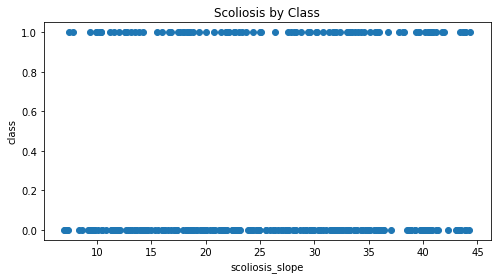

In [48]:
fig, ax = plt.subplots(figsize=(8,4))

plt.scatter(spine_data['scoliosis_slope'], spine_data['class'])
plt.title("Scoliosis by Class")
plt.xlabel('scoliosis_slope')
ax = plt.ylabel('class')

In [49]:
spine_data_corr = spine_data.corr()
spine_data_corr

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251,-0.353336
pelvic tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550,-0.326063
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054,-0.312484
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853,-0.210602
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145,0.309857
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023,-0.443687
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893,-0.055865
direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021,0.039591
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541,0.049354
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243,-0.100044


<AxesSubplot:>

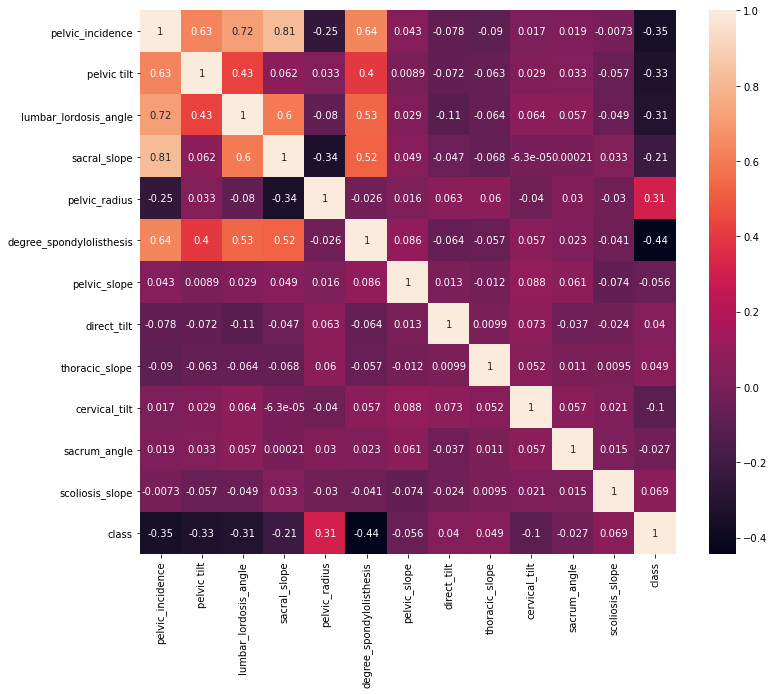

In [50]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(spine_data_corr, annot=True)

In [51]:
X = spine_data.drop('class', axis=1)
Y = spine_data['class']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.20)

In [53]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(10, ), 
                    max_iter=100, 
                    activation = 'relu',
                    alpha=0.0001,
                    solver='lbfgs', 
                    verbose=True)

In [54]:
mlp_clf.fit(x_train, y_train)

C:\Users\imoge\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(hidden_layer_sizes=(10,), max_iter=100, solver='lbfgs',
              verbose=True)

In [56]:
y_pred = mlp_clf.predict(x_test)

In [57]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})

pred_results.sample(10)

,y_test,y_pred
134,1,1
18,1,1
50,0,0
173,0,0
195,0,0
63,0,1
218,0,0
144,0,1
212,1,1
265,0,0


In [59]:
accuracy_score(y_test, y_pred)

0.8064516129032258

In [60]:
spine_data_crosstab = pd.crosstab(pred_results.y_test, pred_results.y_pred)
spine_data_crosstab

y_pred,0,1
y_test,,
0,32,11
1,1,18


In [62]:
print(confusion_matrix(y_test, y_pred))

[[32 11]
 [ 1 18]]


In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84        43
           1       0.62      0.95      0.75        19

    accuracy                           0.81        62
   macro avg       0.80      0.85      0.80        62
weighted avg       0.86      0.81      0.81        62



## Text Classification

In [64]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_data = fetch_20newsgroups()
newsgroups_data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [65]:
print(newsgroups_data.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [66]:
newsgroups_data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [67]:
np.unique(newsgroups_data.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [68]:
len(newsgroups_data.data), len(newsgroups_data.target)

(11314, 11314)

In [70]:
tfidf_vect = TfidfVectorizer(stop_words='english')
newsgroups_data_transformed = tfidf_vect.fit_transform(newsgroups_data.data)

In [71]:
x_train, x_test, y_train, y_test = train_test_split(newsgroups_data_transformed, 
                                                    newsgroups_data.target, 
                                                    shuffle=True,
                                                    test_size = 0.2)

In [96]:
mlp_clf = MLPClassifier(activation = 'relu',
                    hidden_layer_sizes= (32),
                    solver='adam', 
                    verbose=False,
                    max_iter=100)

In [97]:
mlp_clf.fit(x_train, y_train)

C:\Users\imoge\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=32, max_iter=100)

In [98]:
y_pred = mlp_clf.predict(x_test)

In [99]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})

pred_results.sample(10)

,y_test,y_pred
1442,1,1
2001,16,16
318,13,13
1749,13,13
2261,11,11
1721,13,13
2232,7,7
748,15,15
1204,16,16
58,0,0


In [100]:
newsgroups_data_crosstab = pd.crosstab(pred_results.y_test, pred_results.y_pred)
newsgroups_data_crosstab

y_pred,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
y_test,,,,,,,,,,,,,,,,,,,,
0,80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,95,7,5,2,1,1,0,0,0,1,0,2,0,0,0,1,0,0,0
2,0,2,86,3,1,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,2,8,100,5,0,6,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2,2,4,101,1,2,0,0,0,0,0,2,0,0,0,0,0,0,0
5,0,3,3,1,0,104,1,0,0,0,0,2,0,0,0,0,0,0,0,0
6,0,0,2,5,7,0,111,6,0,1,1,0,3,0,2,0,0,0,0,0
7,0,0,0,1,0,0,1,118,0,1,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,1,0,2,1,115,0,1,0,3,0,0,0,0,0,0,0


In [101]:
accuracy_score(y_test, y_pred)

0.9257622624834291

## Image Classification

In [102]:
DATASET_PATH = 'datasets/Lego/train/'

In [105]:
# Helper function to load the lego images. Images are listed in subdirectories. Credit Janini Raavi (Pluralsight)
def load_images(path):
    
    images_train = []
    labels_train = []
    
    for sub_folder in os.listdir(path):
        fullpath = os.path.join(path, sub_folder)
        print(fullpath)

        if not os.path.isdir(fullpath):
            continue

        images = os.listdir(fullpath)
        
        for image_filename in images:
            
            image_fullpath = os.path.join(fullpath, image_filename)

            if os.path.isdir(image_fullpath):
                continue
            
            img = cv2.imread(image_fullpath)

            images_train.append(img)
            labels_train.append(sub_folder)
            
    return np.array(images_train), np.array(labels_train)

In [106]:
images_train, labels_train = load_images(DATASET_PATH)

datasets/Lego/train/11214 Bush 3M friction with Cross axle
datasets/Lego/train/18651 Cross Axle 2M with Snap friction
datasets/Lego/train/2357 Brick corner 1x2x2
datasets/Lego/train/3003 Brick 2x2
datasets/Lego/train/3004 Brick 1x2
datasets/Lego/train/3005 Brick 1x1
datasets/Lego/train/3022 Plate 2x2
datasets/Lego/train/3023 Plate 1x2
datasets/Lego/train/3024 Plate 1x1
datasets/Lego/train/3040 Roof Tile 1x2x45deg
datasets/Lego/train/3069 Flat Tile 1x2
datasets/Lego/train/32123 half Bush
datasets/Lego/train/3673 Peg 2M
datasets/Lego/train/3713 Bush for Cross Axle
datasets/Lego/train/3794 Plate 1X2 with 1 Knob
datasets/Lego/train/6632 Technic Lever 3M
datasets/Lego/train/_DS_Store


In [107]:
images_train.shape

(6379, 200, 200, 3)

In [108]:
images_train[0].shape

(200, 200, 3)

In [109]:
labels_train.shape

(6379,)

Label:  11214 Bush 3M friction with Cross axle


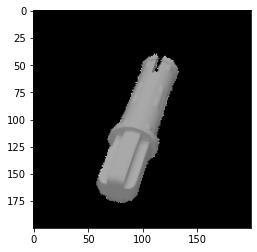

In [110]:
plt.imshow(images_train[10])
print('Label: ', labels_train[10])

In [111]:
# Reshape to give the number of images and the pixels s as 200 x 200 x 3
X = images_train.reshape(images_train.shape[0], 
                         images_train.shape[1] * images_train.shape[2] * images_train.shape[3])

In [112]:
X.shape

(6379, 120000)

In [118]:
encoder = preprocessing.LabelEncoder()
Y = encoder.fit_transform(labels_train)
Y[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [121]:
np.unique(Y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [122]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size = 0.2)
x_train.shape, y_train.shape

((5103, 120000), (5103,))

In [125]:
clf_image = MLPClassifier(activation = 'relu',
                          hidden_layer_sizes = (100, 100, 100), 
                          solver='adam', 
                          verbose=False,
                          max_iter=100)

In [126]:
clf_image.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100)

In [127]:
y_pred = clf_image.predict(x_test)

In [128]:
accuracy_score(y_test, y_pred)

0.8307210031347962

## Dimensionality Reduction Techniques - Restricted Boltzmann Machine

In [129]:
mnist_data = pd.read_csv('datasets/mnist.csv')

In [130]:
mnist_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
mnist_data.shape

(42000, 785)

In [132]:
mnist_data['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [139]:
mnist_features = mnist_data[mnist_data.columns[1:]]
mnist_labels = mnist_data['label']

In [141]:
def display_image(index):
    print("Digit: ", mnist_labels[index])
        
    plt.imshow(mnist_features.loc[index].values.reshape(28,28), cmap='Greys')

Digit:  8


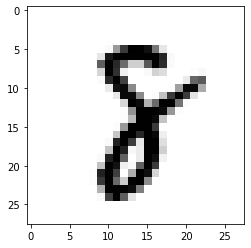

In [142]:
display_image(300)

In [143]:
# Put data back to an array
mnist_features = np.asarray(mnist_features)
mnist_features.shape

(42000, 784)

In [144]:
# Rescale
mnist_features = mnist_features/255.

In [145]:
x_train, x_test, y_train, y_test = train_test_split(mnist_features,
                                                    mnist_labels, 
                                                    shuffle=True,
                                                    test_size=0.2)

In [149]:
logistic = linear_model.LogisticRegression(solver='lbfgs',
                                           max_iter=1000,
                                           multi_class='multinomial')

In [155]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'C' : [0.1, 1, 5]}]

grid_search = GridSearchCV(logistic, param_grid, cv=2)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'C': 0.1}

In [156]:
# Higher values of C are lower regularization
for i in range(3):
    print('Parameters: ', grid_search.cv_results_['params'][i])
    print('Mean Test Score: ', grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ', grid_search.cv_results_['rank_test_score'][i])

Parameters:  {'C': 0.1}
Mean Test Score:  0.9154166666666667
Rank:  1
Parameters:  {'C': 1}
Mean Test Score:  0.909672619047619
Rank:  2
Parameters:  {'C': 5}
Mean Test Score:  0.8991369047619048
Rank:  3


In [157]:
# Set the RBM model based on Bernoulli distribution
rbm = BernoulliRBM(verbose=True)

rbm_features_classifier = Pipeline(steps = [('rbm', rbm), 
                                            ('logistic', logistic)])

rbm.learning_rate = 0.06
logistic.C = grid_search.best_params_['C']

In [158]:
rbm_features_classifier.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'rbm', 'logistic', 'rbm__batch_size', 'rbm__learning_rate', 'rbm__n_components', 'rbm__n_iter', 'rbm__random_state', 'rbm__verbose', 'logistic__C', 'logistic__class_weight', 'logistic__dual', 'logistic__fit_intercept', 'logistic__intercept_scaling', 'logistic__l1_ratio', 'logistic__max_iter', 'logistic__multi_class', 'logistic__n_jobs', 'logistic__penalty', 'logistic__random_state', 'logistic__solver', 'logistic__tol', 'logistic__verbose', 'logistic__warm_start'])

In [160]:
for i in range(8):
    print('Parameters: ', grid_search.cv_results_['params'][i])
    print('Mean Test Score: ', grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ', grid_search.cv_results_['rank_test_score'][i])

Parameters:  {'rbm__n_components': 5, 'rbm__n_iter': 5}
Mean Test Score:  0.11148809523809523
Rank:  8
Parameters:  {'rbm__n_components': 5, 'rbm__n_iter': 20}
Mean Test Score:  0.11166666666666666
Rank:  7
Parameters:  {'rbm__n_components': 50, 'rbm__n_iter': 5}
Mean Test Score:  0.8780654761904763
Rank:  6
Parameters:  {'rbm__n_components': 50, 'rbm__n_iter': 20}
Mean Test Score:  0.887172619047619
Rank:  5
Parameters:  {'rbm__n_components': 100, 'rbm__n_iter': 5}
Mean Test Score:  0.9191666666666667
Rank:  4
Parameters:  {'rbm__n_components': 100, 'rbm__n_iter': 20}
Mean Test Score:  0.9242857142857143
Rank:  3
Parameters:  {'rbm__n_components': 150, 'rbm__n_iter': 5}
Mean Test Score:  0.9373214285714286
Rank:  1
Parameters:  {'rbm__n_components': 150, 'rbm__n_iter': 20}
Mean Test Score:  0.9359821428571429
Rank:  2


In [161]:
# The best model had accuracy similar to the whole model with just 150 features.